# Guiding questions

How has the housing crisis progressed in NYC since 1983, as reflected by trends in the number of homeless at shelters every night?

In [107]:
from collections import defaultdict
import pandas as pd
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
from tika import parser 
from multiprocessing import Pool
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib

In [108]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


%matplotlib inline
file = '../data/NYC_Homeless_Shelter_Population.pdf'
# Parse data from file
file_data = parser.from_file(file)
# Get files text content
text = file_data['content']
# print(text) formatting is incorrect


In [109]:
df = pd.read_csv(
    '../data/NYC_Homeless_Shelter_Population.csv', 
    thousands=',',
    header=10, 
    engine='python', # default pandas engine does not support skipfooter
    index_col=False, # don't use first column (year) as dataframe index
    names = ['Date', 'Total Population', 'Total Families','Total Persons in Families', 'Children', 'Adults in Families', 
            'Single Adults', 'Single Men', 'Single Women', 'Average Length of Shelter Stays for Families (in Days)']
)

#print(df)
#printing nan for empty data point (data not available)
#want just Total Population
df.head()

,Date,Total Population,Total Families,Total Persons in Families,Children,Adults in Families,Single Adults,Single Men,Single Women,Average Length of Shelter Stays for Families (in Days)
0,Jan-83,NaN,NaN,NaN,NaN,NaN,4509,3975,534,NaN
1,Feb-83,NaN,1520.0,NaN,NaN,NaN,4850,4274,576,NaN
2,Mar-83,NaN,1655.0,NaN,NaN,NaN,4991,4413,578,NaN
3,Apr-83,NaN,1761.0,NaN,NaN,NaN,5123,4543,580,NaN
4,May-83,NaN,1839.0,NaN,NaN,NaN,5080,4489,591,NaN


In [110]:
# Format: { year: { field: { sex : count } } }
#counts = defaultdict(lambda: defaultdict(dict))

date = df['Date']
pop = df['Total Population']
total_pop = dict(zip(date, pop))
#total_pop


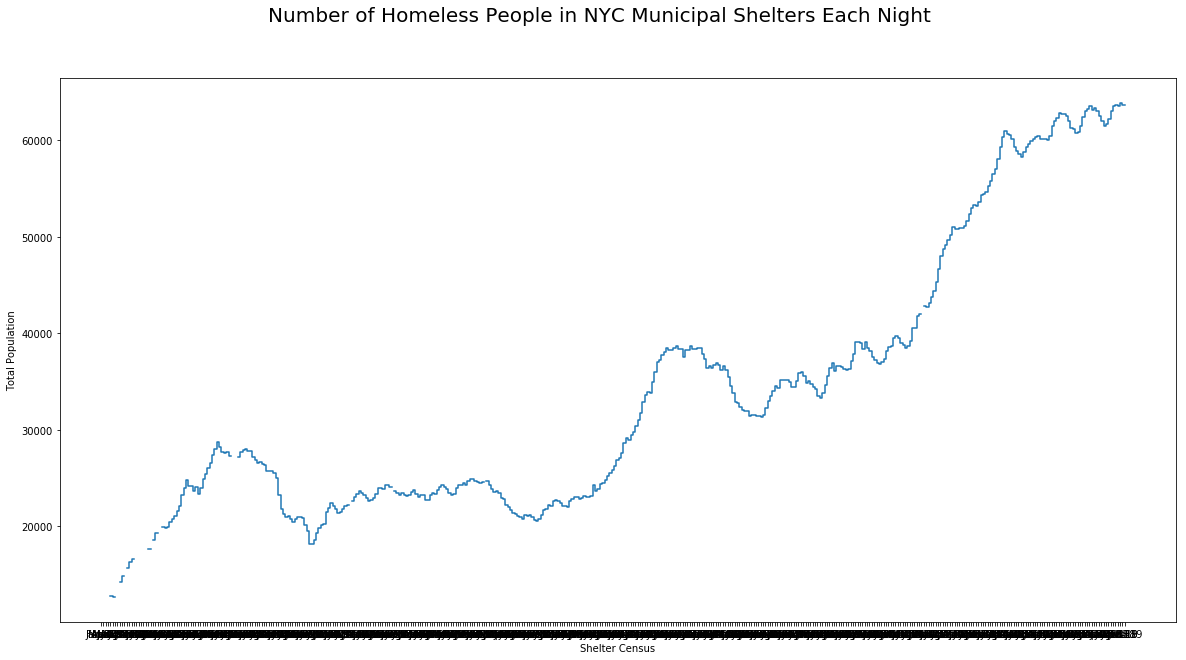

In [111]:
#plt.plot(df['Date'], df['Total Population'])
x = date
y = pop

fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Homeless People in NYC Municipal Shelters Each Night', 
            fontsize = 20)

plt.xlabel('Shelter Census')
plt.ylabel('Total Population')


plt.step(x, y)

#export to pdf
plt.savefig("shelters-graphic.pdf", transparent = True)


plt.show()

# Findings

Population of Homeless in shelters every night has grown tremendenously. Data started Jun-1983 at 12,830 people. Today 63,615+ homeless stay in shelters. This can be seen as a consequence of the housing crisis.